In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [113]:
# Load dataset
data = pd.read_csv('sleep_health_lifestyle_dataset.csv')

Correlation (Physical Activity vs Sleep Duration): PearsonRResult(statistic=0.05380599199267747, pvalue=0.28303341774467994)
Correlation (Physical Activity vs Sleep Quality): PearsonRResult(statistic=-0.03257319934067381, pvalue=0.5159521674749811)


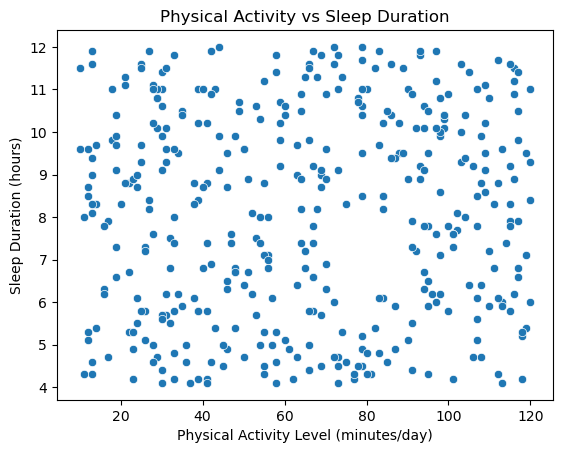

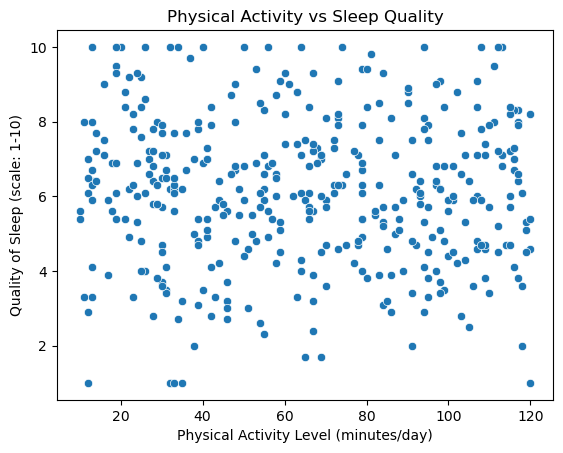

In [114]:
# 1. Lifestyle Factors and Sleep
# Question: How do physical activity levels affect sleep duration and quality?
correlation_duration = stats.pearsonr(data['Physical Activity Level (minutes/day)'], data['Sleep Duration (hours)'])
correlation_quality = stats.pearsonr(data['Physical Activity Level (minutes/day)'], data['Quality of Sleep (scale: 1-10)'])

print("Correlation (Physical Activity vs Sleep Duration):", correlation_duration)
print("Correlation (Physical Activity vs Sleep Quality):", correlation_quality)

sns.scatterplot(x='Physical Activity Level (minutes/day)', y='Sleep Duration (hours)', data=data)
plt.title('Physical Activity vs Sleep Duration')
plt.show()

sns.scatterplot(x='Physical Activity Level (minutes/day)', y='Quality of Sleep (scale: 1-10)', data=data)
plt.title('Physical Activity vs Sleep Quality')
plt.show()

Chi-Square Test for Daily Steps vs Sleep Disorder: 110.0 0.45514993444945895


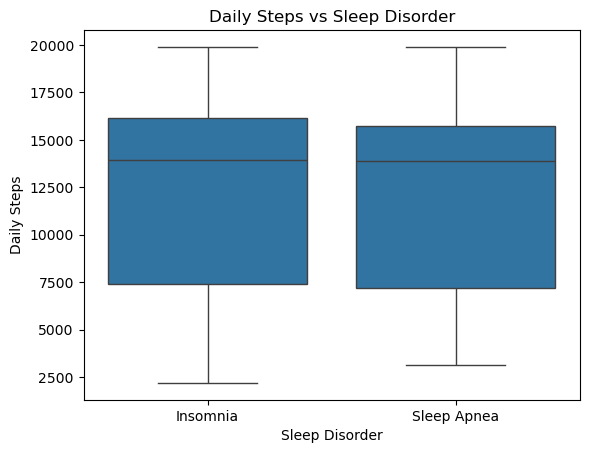

In [115]:
# Question: Is there a significant relationship between daily step count and the presence of sleep disorders?
chi2, p, dof, expected = stats.chi2_contingency(pd.crosstab(data['Daily Steps'], data['Sleep Disorder']))
print("Chi-Square Test for Daily Steps vs Sleep Disorder:", chi2, p)

sns.boxplot(x='Sleep Disorder', y='Daily Steps', data=data)
plt.title('Daily Steps vs Sleep Disorder')
plt.show()

In [116]:
# Question: How does stress level influence sleep quality across different age groups?
interaction_model = ols('Q("Quality of Sleep (scale: 1-10)") ~ Q("Stress Level (scale: 1-10)") * C(Age)', data=data).fit()
print(interaction_model.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Q("Quality of Sleep (scale: 1-10)")   R-squared:                       0.276
Model:                                             OLS   Adj. R-squared:                  0.003
Method:                                  Least Squares   F-statistic:                     1.012
Date:                                 Fri, 17 Jan 2025   Prob (F-statistic):              0.460
Time:                                         22:02:08   Log-Likelihood:                -774.96
No. Observations:                                  400   AIC:                             1770.
Df Residuals:                                      290   BIC:                             2209.
Df Model:                                          109                                         
Covariance Type:                             nonrobust                                         
                                        

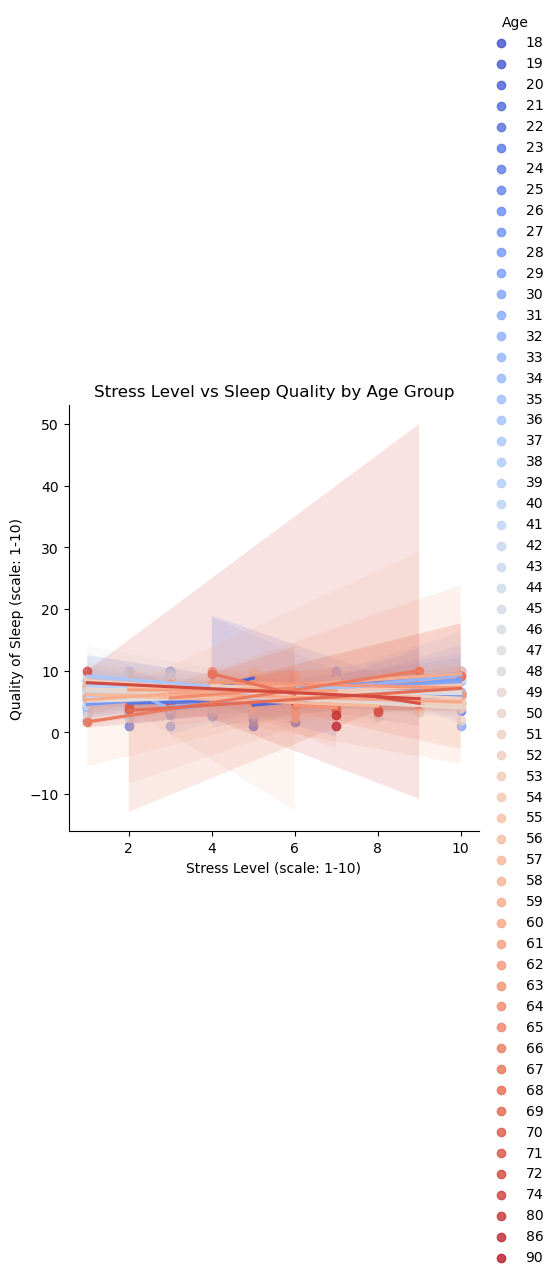

In [117]:
sns.lmplot(x='Stress Level (scale: 1-10)', y='Quality of Sleep (scale: 1-10)', hue='Age', data=data, palette='coolwarm')
plt.title('Stress Level vs Sleep Quality by Age Group')
plt.show()

                           sum_sq     df         F    PR(>F)
C(Q("BMI Category"))    11.910201    3.0  0.692967  0.556768
Residual              2268.719174  396.0       NaN       NaN
                           sum_sq     df         F    PR(>F)
C(Q("BMI Category"))    10.134058    3.0  0.864496  0.459546
Residual              1547.370717  396.0       NaN       NaN


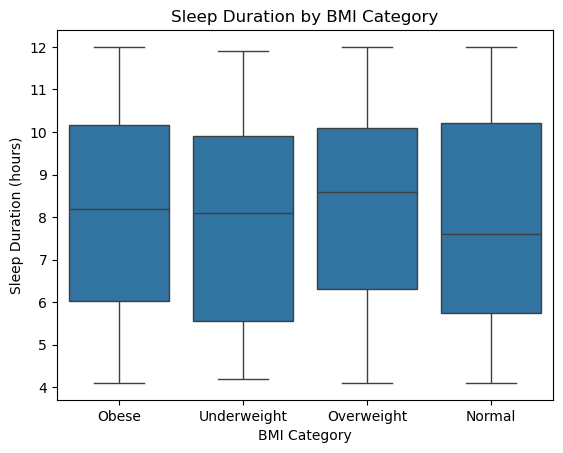

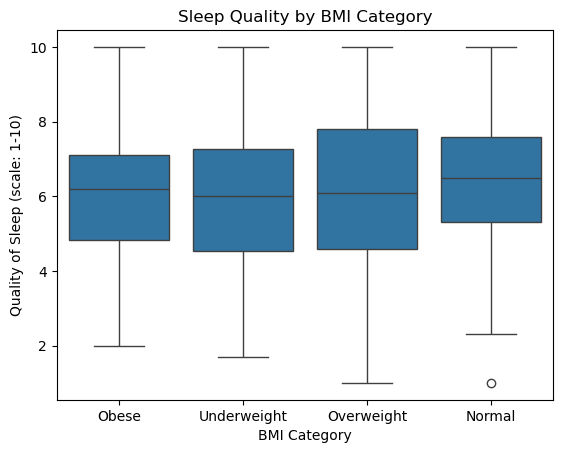

In [118]:
# 2. Health Metrics and Sleep
# Question: Does BMI category correlate with sleep duration or quality?
anova_bmi_sleep_duration = ols('Q("Sleep Duration (hours)") ~ C(Q("BMI Category"))', data=data).fit()
anova_bmi_sleep_quality = ols('Q("Quality of Sleep (scale: 1-10)") ~ C(Q("BMI Category"))', data=data).fit()

print(sm.stats.anova_lm(anova_bmi_sleep_duration, typ=2))
print(sm.stats.anova_lm(anova_bmi_sleep_quality, typ=2))

sns.boxplot(x='BMI Category', y='Sleep Duration (hours)', data=data)
plt.title('Sleep Duration by BMI Category')
plt.show()

sns.boxplot(x='BMI Category', y='Quality of Sleep (scale: 1-10)', data=data)
plt.title('Sleep Quality by BMI Category')
plt.show() 

T-Test (Sleep Duration by Gender): TtestResult(statistic=0.05812013684770081, pvalue=0.9536821033483935, df=398.0)
T-Test (Sleep Quality by Gender): TtestResult(statistic=1.6319587997200915, pvalue=0.10347909028723809, df=398.0)


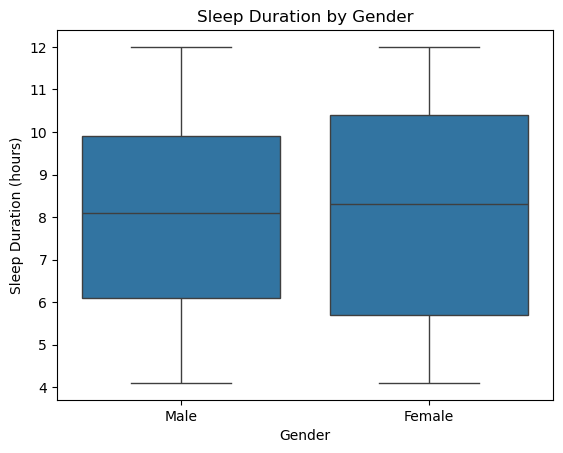

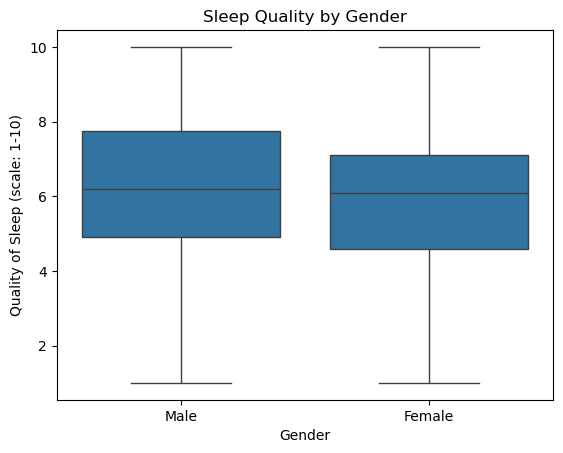

In [119]:
# 3. Demographics and Sleep
# Question: Do sleep duration and quality differ significantly by gender?
gender_sleep_duration = stats.ttest_ind(
    data.loc[data['Gender'] == 'Male', 'Sleep Duration (hours)'],
    data.loc[data['Gender'] == 'Female', 'Sleep Duration (hours)']
)

gender_sleep_quality = stats.ttest_ind(
    data.loc[data['Gender'] == 'Male', 'Quality of Sleep (scale: 1-10)'],
    data.loc[data['Gender'] == 'Female', 'Quality of Sleep (scale: 1-10)']
)

print("T-Test (Sleep Duration by Gender):", gender_sleep_duration)
print("T-Test (Sleep Quality by Gender):", gender_sleep_quality)

sns.boxplot(x='Gender', y='Sleep Duration (hours)', data=data)
plt.title('Sleep Duration by Gender')
plt.show()

sns.boxplot(x='Gender', y='Quality of Sleep (scale: 1-10)', data=data)
plt.title('Sleep Quality by Gender')
plt.show()

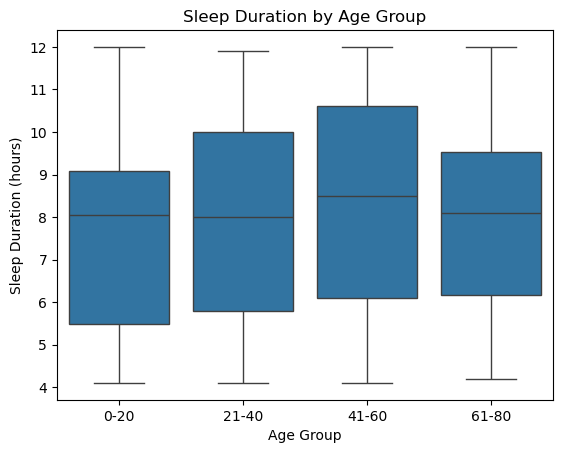

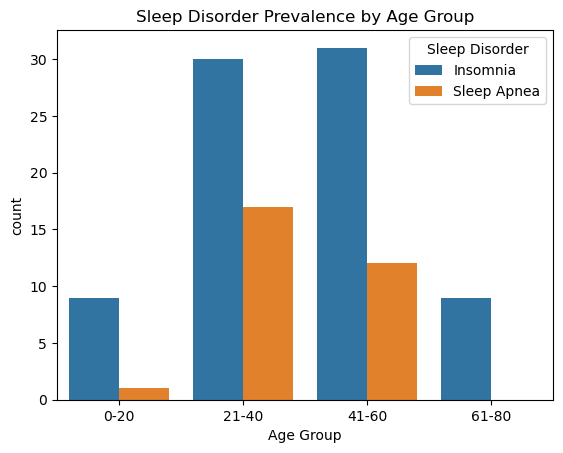

In [120]:
# Question: How do age groups vary in sleep duration and the prevalence of sleep disorders?
age_groups = pd.cut(data['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])
data['Age Group'] = age_groups

sns.boxplot(x='Age Group', y='Sleep Duration (hours)', data=data)
plt.title('Sleep Duration by Age Group')
plt.show()

sns.countplot(x='Age Group', hue='Sleep Disorder', data=data)
plt.title('Sleep Disorder Prevalence by Age Group')
plt.show()

                                     OLS Regression Results                                    
Dep. Variable:     Q("Quality of Sleep (scale: 1-10)")   R-squared:                       0.009
Model:                                             OLS   Adj. R-squared:                  0.002
Method:                                  Least Squares   F-statistic:                     1.259
Date:                                 Fri, 17 Jan 2025   Prob (F-statistic):              0.288
Time:                                         22:02:25   Log-Likelihood:                -837.55
No. Observations:                                  400   AIC:                             1683.
Df Residuals:                                      396   BIC:                             1699.
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
                                        

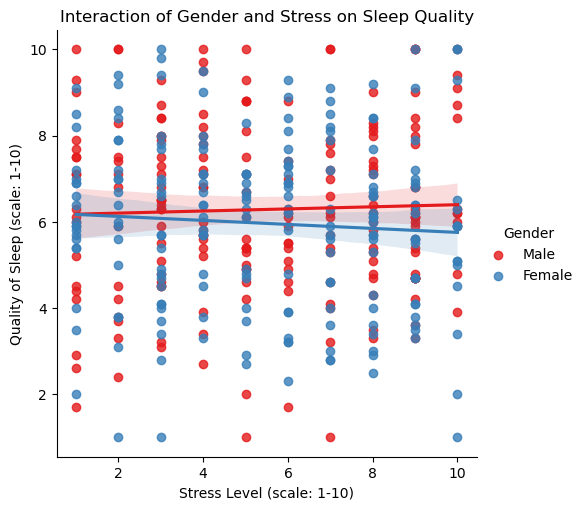

In [121]:
# Question: What is the interaction between gender, stress level, and sleep quality?
interaction_model_gender = ols('Q("Quality of Sleep (scale: 1-10)") ~ Q("Stress Level (scale: 1-10)") * C(Gender)', data=data).fit()
print(interaction_model_gender.summary())

sns.lmplot(x='Stress Level (scale: 1-10)', y='Quality of Sleep (scale: 1-10)', hue='Gender', data=data, palette='Set1')
plt.title('Interaction of Gender and Stress on Sleep Quality')
plt.show()

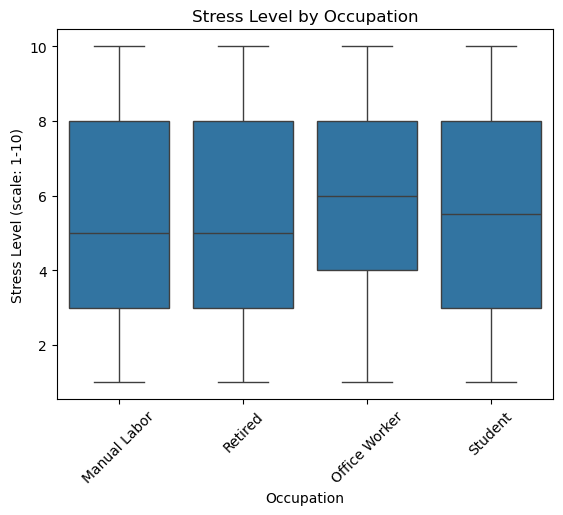

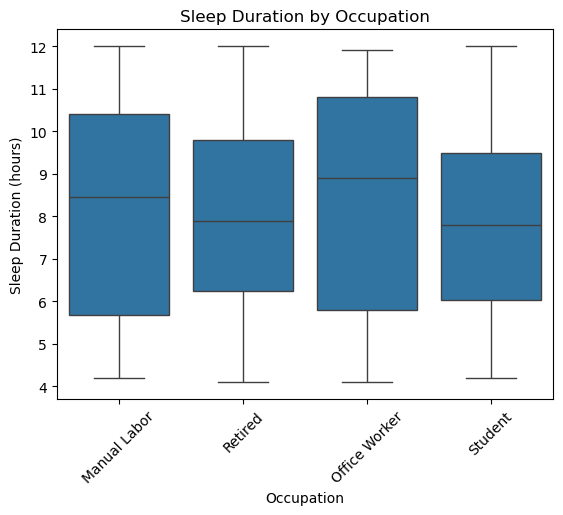

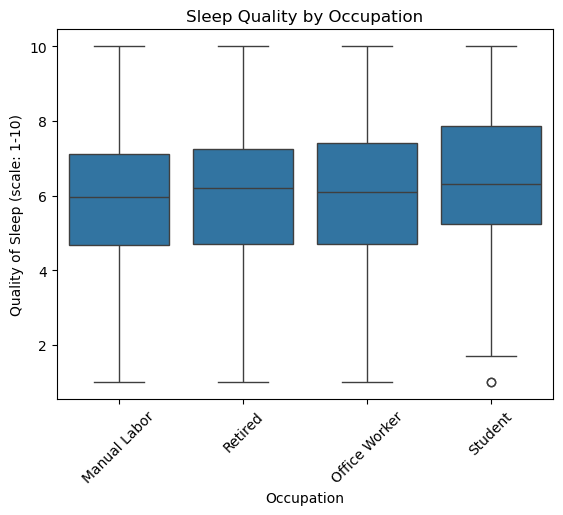

In [122]:
# 4. Occupation and Sleep
# Question: How does occupation impact stress levels, sleep duration, and quality?
sns.boxplot(x='Occupation', y='Stress Level (scale: 1-10)', data=data)
plt.title('Stress Level by Occupation')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='Occupation', y='Sleep Duration (hours)', data=data)
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='Occupation', y='Quality of Sleep (scale: 1-10)', data=data)
plt.title('Sleep Quality by Occupation')
plt.xticks(rotation=45)
plt.show()

Chi-Square Test for Sleep Disorder vs Occupation: 0.6904250105556763 0.875453739381985


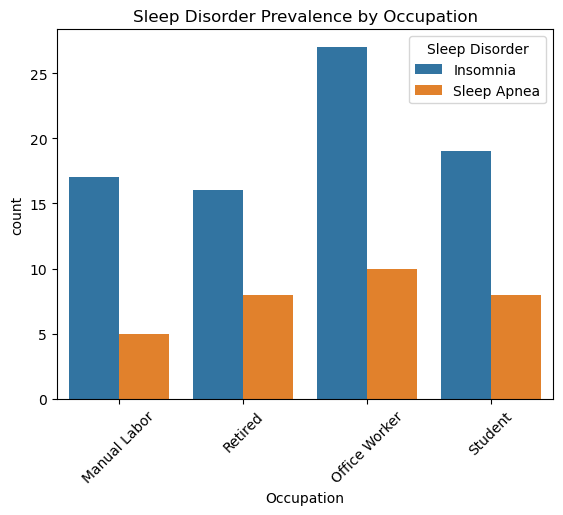

In [123]:
# Question: Are there significant differences in sleep disorders across occupations?
chi2_occupation, p_occupation, _, _ = stats.chi2_contingency(pd.crosstab(data['Occupation'], data['Sleep Disorder']))
print("Chi-Square Test for Sleep Disorder vs Occupation:", chi2_occupation, p_occupation)

sns.countplot(x='Occupation', hue='Sleep Disorder', data=data)
plt.title('Sleep Disorder Prevalence by Occupation')
plt.xticks(rotation=45)
plt.show()

In [124]:
# 6. Combined Factors and Interactions
# Question: How do stress and physical activity jointly influence sleep quality?
interaction_model_combined = ols('Q("Quality of Sleep (scale: 1-10)") ~ Q("Stress Level (scale: 1-10)") * Q("Physical Activity Level (minutes/day)")', data=data).fit()
print(interaction_model_combined.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Q("Quality of Sleep (scale: 1-10)")   R-squared:                       0.003
Model:                                             OLS   Adj. R-squared:                 -0.005
Method:                                  Least Squares   F-statistic:                    0.4022
Date:                                 Fri, 17 Jan 2025   Prob (F-statistic):              0.752
Time:                                         22:02:29   Log-Likelihood:                -838.84
No. Observations:                                  400   AIC:                             1686.
Df Residuals:                                      396   BIC:                             1702.
Df Model:                                            3                                         
Covariance Type:                             nonrobust                                         
                                        

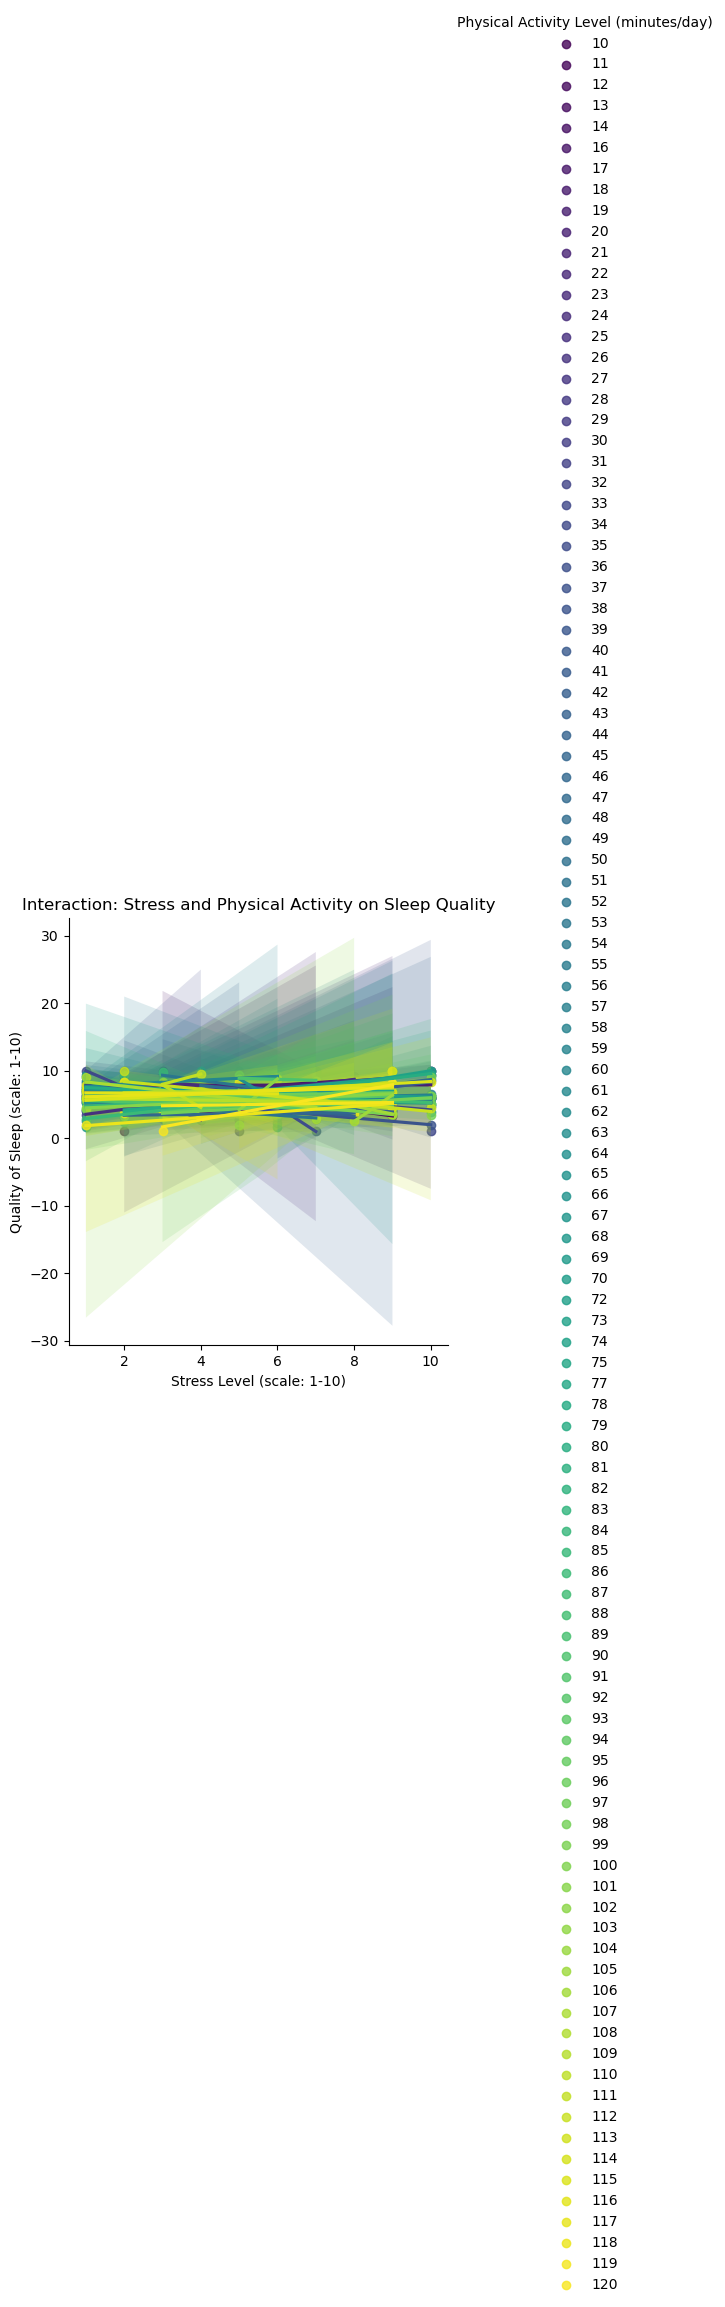

In [125]:
sns.lmplot(x='Stress Level (scale: 1-10)', y='Quality of Sleep (scale: 1-10)', hue='Physical Activity Level (minutes/day)', data=data, palette='viridis')
plt.title('Interaction: Stress and Physical Activity on Sleep Quality')
plt.show()

C:\Users\Hibak Ramadan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


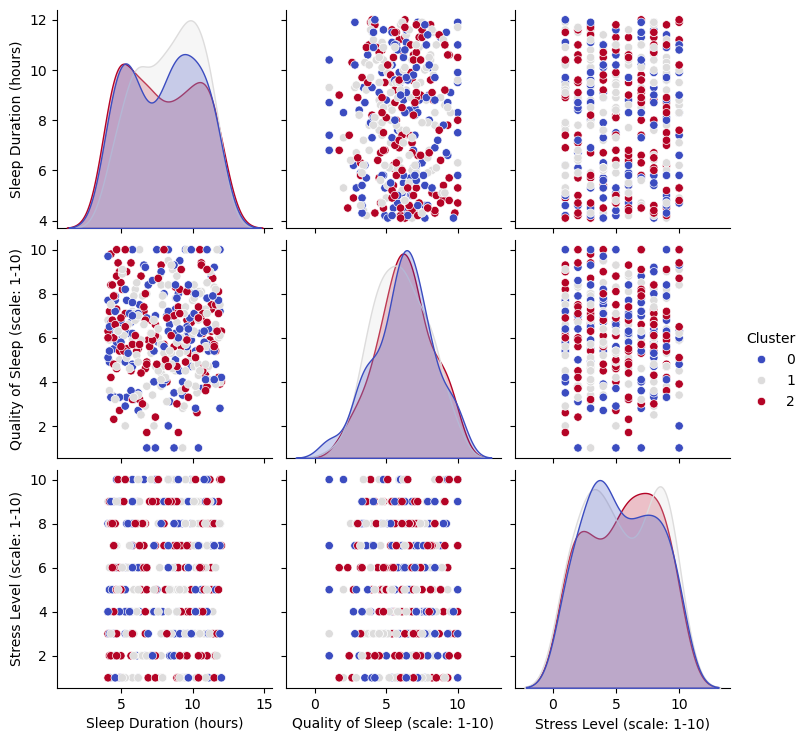

In [126]:
# 7. Advanced Questions for Computational Analysis

# Question: Can clustering techniques group individuals based on their sleep behavior and associated factors?
clustering_data = data[['Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)', 'Stress Level (scale: 1-10)', 'Physical Activity Level (minutes/day)']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(clustering_data)
data['Cluster'] = kmeans.labels_

sns.pairplot(data, vars=['Sleep Duration (hours)', 'Quality of Sleep (scale: 1-10)', 'Stress Level (scale: 1-10)'], hue='Cluster', palette='coolwarm')
plt.show()

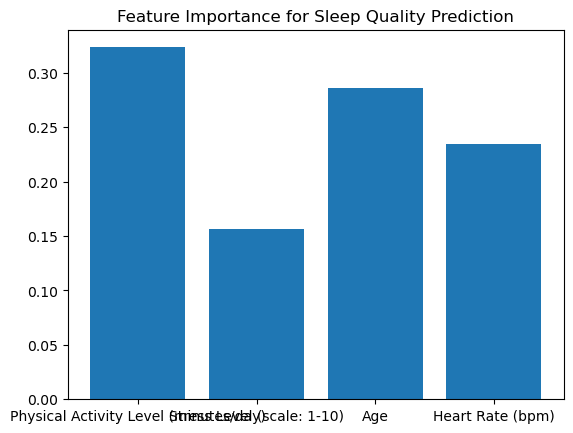

In [127]:
# Question: Using machine learning, can we predict sleep quality scores based on lifestyle and health metrics?
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = data[['Physical Activity Level (minutes/day)', 'Stress Level (scale: 1-10)', 'Age', 'Heart Rate (bpm)']]
y = data['Quality of Sleep (scale: 1-10)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importance = rf_model.feature_importances_

# Plot feature importances
plt.bar(X.columns, importance)
plt.title('Feature Importance for Sleep Quality Prediction')
plt.show()

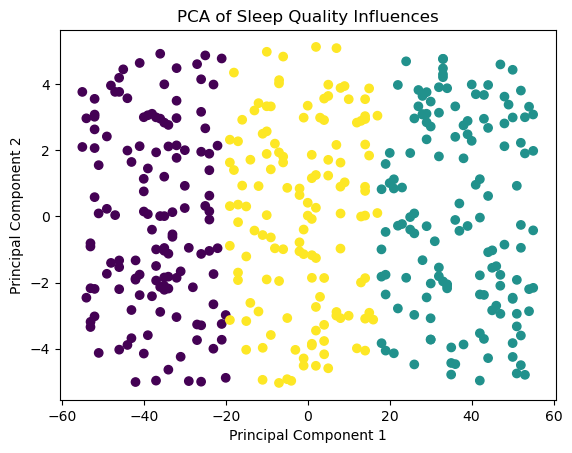

In [128]:
# Question: What are the latent variables influencing sleep quality across the population?
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('PCA of Sleep Quality Influences')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\Hibak Ramadan\AppData\Local\Temp\ipykernel_15060\3363878038.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Occupation', y='Sleep Duration (hours)', palette='pastel')


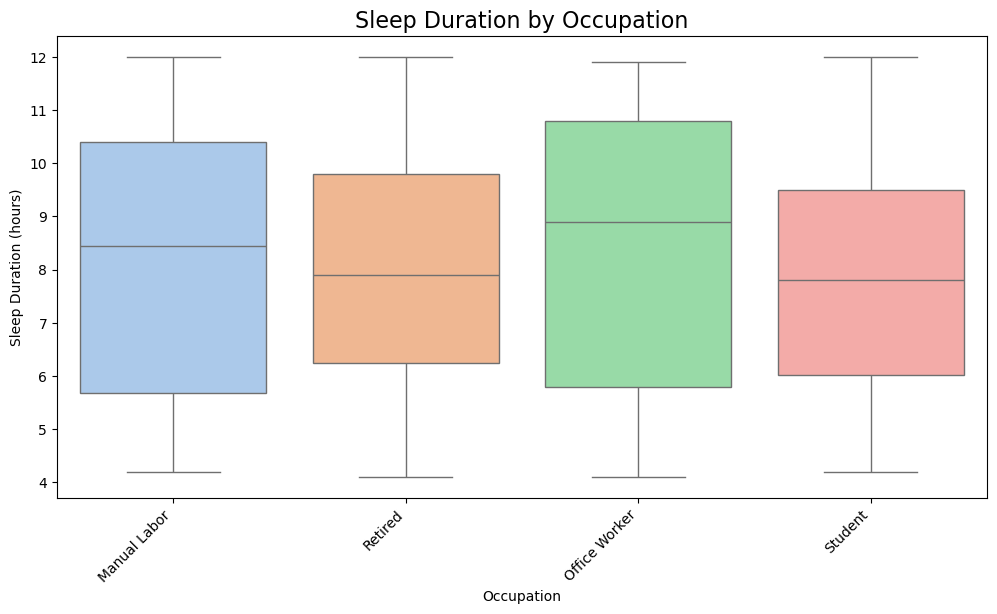

In [129]:
from scipy.stats import f_oneway

# 1. ANOVA: Sleep Duration vs Occupation
occupations = data['Occupation'].unique()
sleep_duration_by_occupation = [data['Sleep Duration (hours)'][data['Occupation'] == occ] for occ in occupations]

anova_result_sleep_duration = f_oneway(*sleep_duration_by_occupation)

# Visualizing Sleep Duration by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Occupation', y='Sleep Duration (hours)', palette='pastel')
plt.title("Sleep Duration by Occupation", fontsize=16)
plt.xlabel("Occupation")
plt.ylabel("Sleep Duration (hours)")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Hibak Ramadan\AppData\Local\Temp\ipykernel_15060\2577780573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Occupation', y='Quality of Sleep (scale: 1-10)', palette='coolwarm')


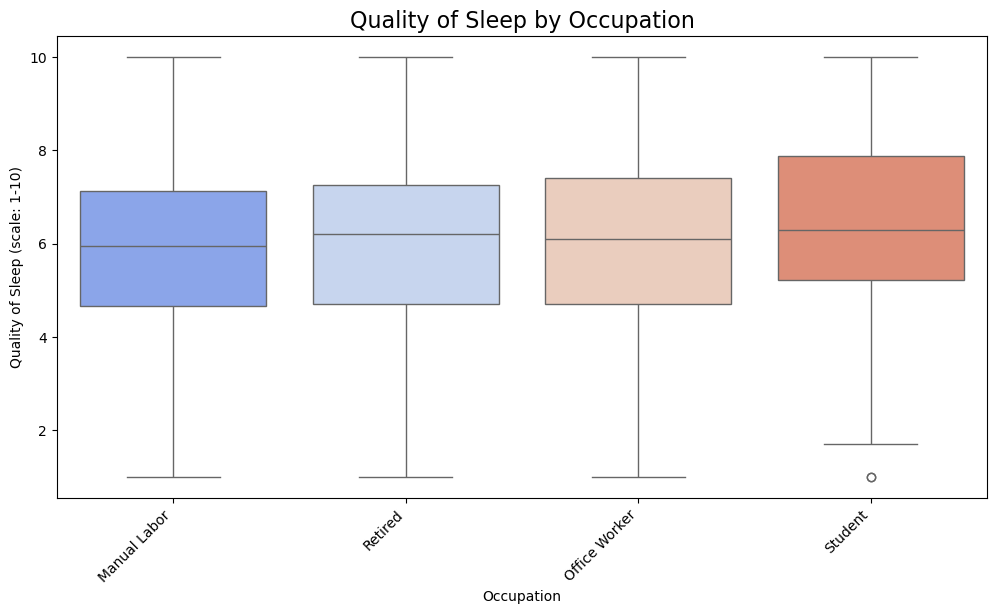

In [130]:
# 2. ANOVA: Quality of Sleep vs Occupation
quality_of_sleep_by_occupation = [data['Quality of Sleep (scale: 1-10)'][data['Occupation'] == occ] for occ in occupations]

anova_result_quality_of_sleep = f_oneway(*quality_of_sleep_by_occupation)

# Visualizing Quality of Sleep by Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Occupation', y='Quality of Sleep (scale: 1-10)', palette='coolwarm')
plt.title("Quality of Sleep by Occupation", fontsize=16)
plt.xlabel("Occupation")
plt.ylabel("Quality of Sleep (scale: 1-10)")
plt.xticks(rotation=45, ha='right')
plt.show()

Chi-Square Statistic: 0.6904250105556762
P-Value: 0.8754537393819851
Degrees of Freedom: 3


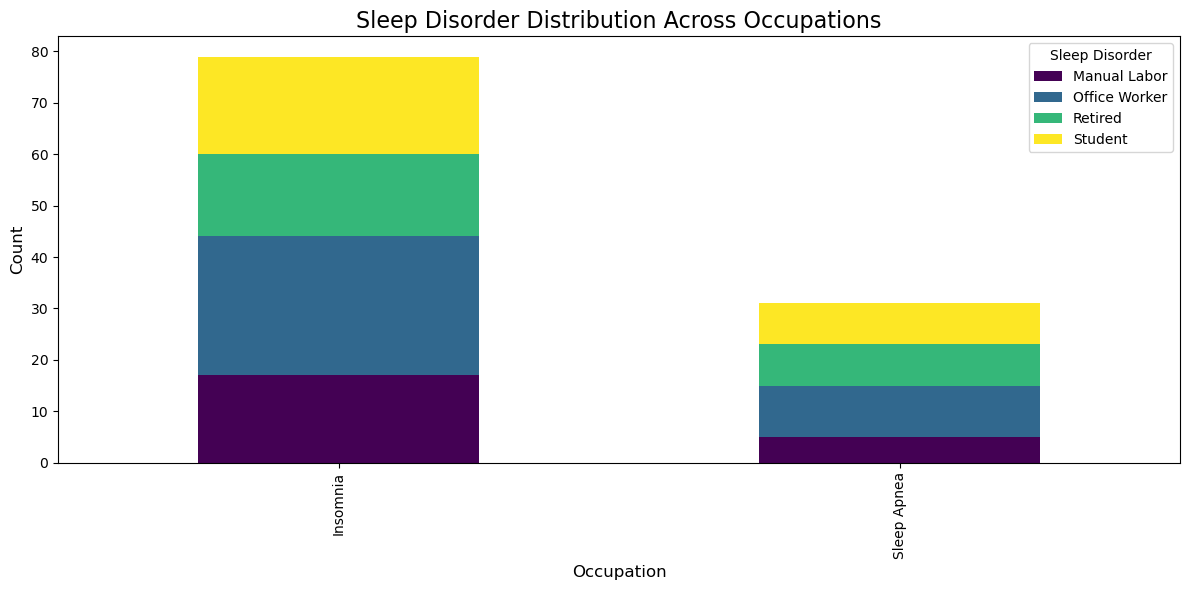

In [132]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame with columns 'Sleep Disorder' and 'Occupation'

# 3. Chi-Square Test: Sleep Disorder vs Occupation
contingency_table_sleep_disorder = pd.crosstab(data['Sleep Disorder'], data['Occupation'])

# Perform the Chi-Square test
chi2_sleep_disorder, p_sleep_disorder, dof_sleep_disorder, expected = chi2_contingency(contingency_table_sleep_disorder)

# Print results
print(f"Chi-Square Statistic: {chi2_sleep_disorder}")
print(f"P-Value: {p_sleep_disorder}")
print(f"Degrees of Freedom: {dof_sleep_disorder}")

# Visualizing Sleep Disorder by Occupation
contingency_table_sleep_disorder.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Sleep Disorder Distribution Across Occupations", fontsize=16)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Sleep Disorder")
plt.tight_layout()
plt.show()


In [134]:
# Displaying ANOVA and Chi-Square Results
analysis_results = {
    "ANOVA (Sleep Duration vs Occupation)": {
        "F-Statistic": anova_result_sleep_duration.statistic,
        "P-Value": anova_result_sleep_duration.pvalue
    },
    "ANOVA (Quality of Sleep vs Occupation)": {
        "F-Statistic": anova_result_quality_of_sleep.statistic,
        "P-Value": anova_result_quality_of_sleep.pvalue
    },
    "Chi-Square (Sleep Disorder vs Occupation)": {
        "Chi-Square Statistic": chi2_sleep_disorder,
        "P-Value": p_sleep_disorder,
        "Degrees of Freedom": dof_sleep_disorder
    }
}

analysis_results

{'ANOVA (Sleep Duration vs Occupation)': {'F-Statistic': 0.7828644331362776,
  'P-Value': 0.504029048990843},
 'ANOVA (Quality of Sleep vs Occupation)': {'F-Statistic': 0.5016586931743379,
  'P-Value': 0.681343394307085},
 'Chi-Square (Sleep Disorder vs Occupation)': {'Chi-Square Statistic': 0.6904250105556762,
  'P-Value': 0.8754537393819851,
  'Degrees of Freedom': 3}}

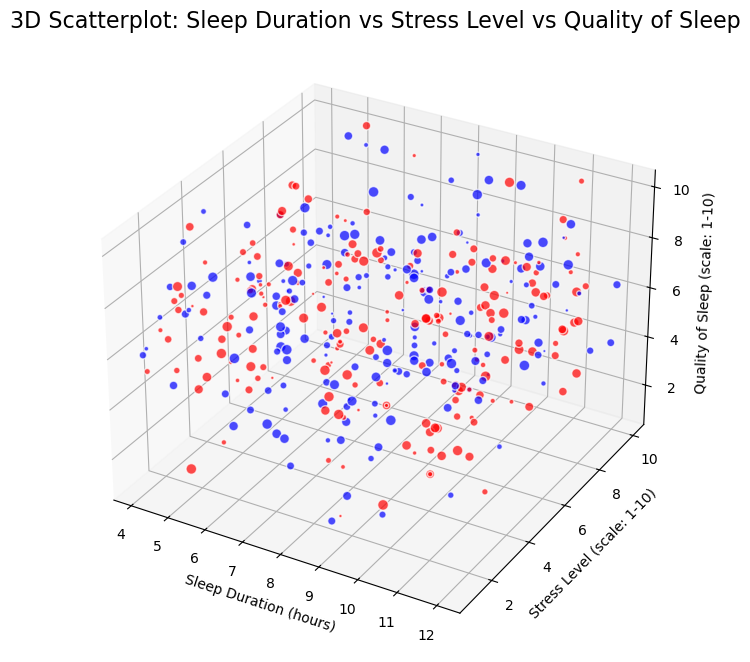

In [136]:
# Using Matplotlib for a 3D scatterplot as an alternative
from mpl_toolkits.mplot3d import Axes3D

# Setting up the 3D scatterplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot variables
x = data['Sleep Duration (hours)']
y = data['Stress Level (scale: 1-10)']
z = data['Quality of Sleep (scale: 1-10)']
color = data['Gender'].map({'Male': 'blue', 'Female': 'red'})
size = data['Physical Activity Level (minutes/day)']

# Plotting the points
scatter = ax.scatter(x, y, z, c=color, s=size / 2, alpha=0.7, edgecolors='w')

# Setting axis labels
ax.set_title("3D Scatterplot: Sleep Duration vs Stress Level vs Quality of Sleep", fontsize=16)
ax.set_xlabel("Sleep Duration (hours)")
ax.set_ylabel("Stress Level (scale: 1-10)")
ax.set_zlabel("Quality of Sleep (scale: 1-10)")

plt.show()
